# Using the same code as before, please solve the following exercises
    
    4. Examine the code where we plot the data. Study how we managed to get the value of the outputs. 
    In a similar way, find get the value of the weights and the biases and print it. This exercise will help you comprehend the TensorFlow syntax
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Similar to the code for the outputs:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
               
We can "catch" the values of the weights and the biases following the code:

w = sess.run([weights], 
               feed_dict={inputs: training_data['inputs']})
               
b = sess.run([biases], 
               feed_dict={inputs: training_data['inputs']})
               
Note that we don't need to feed targets, as we just need to feed input data. We can include the targets if we want to, but the result will be the same.

At the end we print the w and b to be able to observe their values.

print (w)
print (b)

Solution at the bottom of the file.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ten

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [2]:

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [3]:

input_size = 2
output_size = 1

### Outlining the model

In [4]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [5]:

mean_loss = tf.compat.v1.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [6]:

sess = tf.compat.v1.InteractiveSession()

### Initializing variables

In [10]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [11]:

training_data = np.load('TF_intro.npz')

### Learning

In [14]:

for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

0.15983218
0.15983212
0.15983215
0.15983215
0.15983215
0.15983215
0.15983216
0.15983212
0.15983215
0.15983212
0.15983213
0.15983212
0.15983213
0.15983215
0.15983213
0.15983212
0.15983212
0.15983213
0.15983212
0.15983215
0.15983215
0.15983212
0.15983212
0.15983215
0.15983216
0.15983215
0.15983215
0.15983213
0.15983212
0.15983215
0.15983213
0.15983215
0.15983213
0.15983213
0.15983215
0.15983213
0.15983215
0.15983212
0.15983212
0.15983215
0.1598321
0.15983212
0.15983215
0.15983213
0.15983212
0.15983212
0.15983215
0.15983212
0.15983212
0.15983212
0.15983213
0.15983212
0.15983215
0.15983212
0.15983212
0.15983212
0.15983215
0.15983212
0.15983212
0.15983212
0.15983215
0.15983213
0.15983215
0.15983212
0.15983212
0.15983212
0.15983215
0.15983215
0.15983215
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212
0.15983212


### Plotting the data

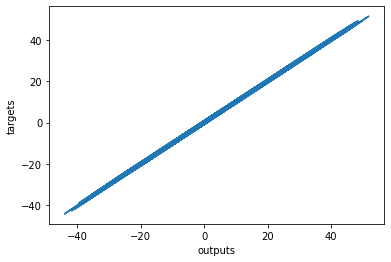

In [15]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
        

In [16]:
w = sess.run([weights], 
               feed_dict={inputs: training_data['inputs']})
               
b = sess.run([biases], 
               feed_dict={inputs: training_data['inputs']})

print (w)
print (b)

[array([[ 1.9979972],
       [-3.000777 ]], dtype=float32)]
[array([4.9660544], dtype=float32)]
